# 商品零售购物篮分析
---
## 背景与挖掘目标

现代商品种类繁多，顾客往往会因此而变得疲于选择，且顾客并不会因为商品选择丰富而购买更多的商品。繁杂的选购过程往往会给顾客带来疲惫的购物体验。对于某些商品，顾客会选择同时购买，如面包与牛奶、薯片与可乐等，但是如果当面包与牛奶或者薯片与可乐分布在商场的两侧，且距离十分遥远时，顾客的购买欲望就会减弱，在时间紧迫的情况下，顾客甚至会放弃购买某些计划购买的商品。相反，如果把牛奶与面包摆放在相邻的位置，既能给顾客提供便利，提升购物体验，又能提高顾客购买的概率，达到促销的目的。许多商场以打折方式作为主要促销手段，以较少的利润为代价获得更高的销量。打折往往会使顾客增加原计划购买商品的数量，而对于原计划不打算购买且不必要的商品，打折的吸引力远远不足。而正确的商品摆放却能提醒顾客购买某些必需品，甚至吸引他们购买感兴趣的商品。
因此，为了获得最大的销售利润，清楚知晓销售什么样的商品、采用什么样的促销策略、商品在货架上如何摆放以及了解顾客的购买习惯和偏好等对销售商尤其重要。通过对商场销售数据进行分析，得到顾客的购买行为特征，并根据发现的规律而采取有效的行动，制定商品摆放、商品定价、新商品采购计划，对增加销量并获取最大利润有重要意义。

本实践项目将根据提供的数据实现以下目标∶

1. 构建零售商品的 Apricri关联规则模型，分析商品之间的关联性。
2. 根据模型结果给出销售策略。

## 分析方法及过程

本次数据挖掘建模的总体流程如下：

![ 购物篮分析流程图 ](https://data.educoder.net/api/attachments/2177880 "购物篮分析流程图" )

购物篮关联规则挖掘主要步骤如下：

1. 对原始数据进行数据探索性分析，分析商品的热销情况与商品结构。
2. 对原始数据进行数据预处理，转换数据形式，使之符合Apriori关联规则算法要求。
3. 在步骤2得到的建模数据基础上，采用Apriori关联规则算法，调整模型输入参数，完成商品关联性分析。
4. 结合实际业务，对模型结果进行分析，根据分析结果给出销售建议，最后输出关联规则结果。

### 数据探索分析

探索数据特征是了解数据的第一步。分析商品热销情况和商品结构，是为了更好地实现企业的经营目标。商品管理应坚持商品齐全和商品优选的原则，产品销售基本满足“二八定律”即80%的销售额是由20%的商品创造的，这些商品是企业主要盈利商品，要作为商品管理的重中之重。商品热销情况分析和商品结构分析也是商品管理不可或缺的一部分，其中商品结构分析能够帮助保证商品的齐全性，热销情况分析可以助力于商品优选。

#### 1. 数据特征

某商品零售企业共收集了9835个购物篮的数据，购物篮数据主要包括3个属性：id、Goods和Types。属性的具体说明如下表所示。

|表名|属性名称|属性说明|
|:---|:---|:---|
|Goods Order | id |商品所属类别的编号｜
|Goods Order |Goods|具体的商品名称|
|Goods Types |Goods|具体的商品名称|
|Goods Types |Types|商品类别|

探索数据的特征，查看每列属性、最大值、最小值是了解数据的第一步。查看数据特征，代码如下。

In [1]:
import numpy as np
import pandas as pd

# 商品数据文件路径
inputfile = 'data2/GoodsOrder.csv'
# 在下面补充代码：读取商品数据文件，编码为'gbk'，赋给变量data
data = pd.read_csv(inputfile,encoding = 'gbk')
#print(type(data))
#print(data)
# 在下面补充代码：打印data的Goods共有多少不同类别的商品
print(len(data["Goods"].value_counts()))

169


In [2]:
# 在下面补充代码：提取data中的‘id’列，重新赋给data
data1 = data["id"]

# 在下面补充代码：计算id的总数、最小值和最大值，打包成列表赋给description变量

description = [data1.count(),data1.min(),data1.max()]
# 在下面补充代码：根据description数据创建DataFrame，指定索引为'Count','Min', 'Max'，转置后重新赋给description变量
description1 = pd.DataFrame(description,index = ['Count','Min', 'Max']).T
# 输出description
description1

,Count,Min,Max
0,43367,1,9835


根据上述描述性统计输出结果可知，每列属性共有43367个观测值，并不存在缺失值。查看"id"属性的最大值和最小值，可知某商品零售企业共收集了9835个购物篮数据，售出商品总数为43367件。

#### 2. 分析热销商品
商品热销情况分析是商品管理中不可或缺的一部分，热销情况分析可以助力商品优选。计算销量排行前10的商品销量及占比，并绘制条形图显示销量前10的商品销量情况，代码如下。

In [3]:
import pandas as pd
# 商品类型数据文件路径
inputfile = 'data2/GoodsOrder.csv'  
# 在下面补充代码：读取商品类型数据文件，编码为'gbk'，赋给data变量
data = pd.read_csv(inputfile,encoding = 'gbk')
#print(data)
# 在下面补充代码：对data按照Goods进行分组，对分组进行计数，并重置索引，赋给group变量
#print(data["Goods"].value_counts())
#print(data.groupby(['Goods']).size())
group = data.groupby(['Goods']).size().reset_index(name='count')

#print(group)
# 在下面补充代码：将group根据id列的值降序排序，赋给group_sorted变量
group_sorted = group.sort_values(by=['count'], ascending=False)
# 在下面补充代码：打印group_sorted的前10行数据，即前10位热销商品
#print(group_sorted[:10]) #用这段代码，输出结果格式不一样
group_sorted.head(10)


,Goods,count
7,全脂牛奶,2513
8,其他蔬菜,1903
155,面包卷,1809
134,苏打,1715
150,酸奶,1372
99,瓶装水,1087
70,根茎类蔬菜,1072
85,热带水果,1032
143,购物袋,969
160,香肠,924


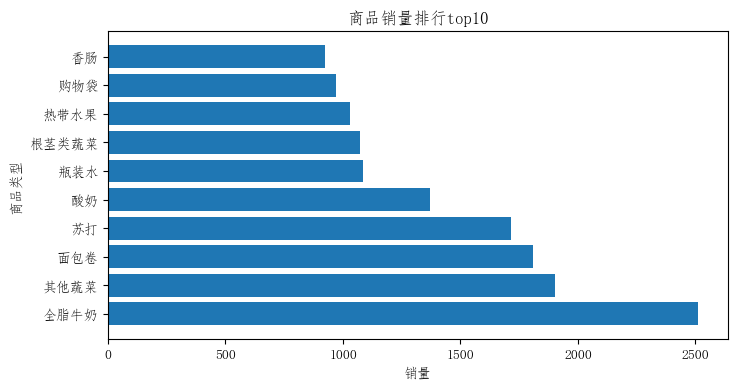

In [4]:
# 任务：画条形图展示出销量排行前10商品的销量
# 在下面补充代码：导入matplotlib中的pyplot子库，取名为plt
import matplotlib.pyplot as plt
# 在下面补充代码：设置图中中文可显示参数
'''
#显示字体库
import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)
'''
plt.rcParams['font.family'] = 'FangSong'  # 替换为你选择的字体

# 在下面补充代码：设置图中负号可显示参数


# 在下面补充代码：取group_sorted的前10行数据中的Goods列赋给x
x = group_sorted['Goods'][:10]
#print(x)
# 在下面补充代码：取group_sorted的前10行数据中的id列赋给y
y = group_sorted['count'][:10]

# 在下面补充代码：设置画布大小为8*4

fig = plt.figure(figsize = (8,4))
# 在下面补充代码：画条形图barh
plt.barh(x,y)


# 在下面补充代码：设置x轴标题为“销量”
plt.xlabel("销量")
# 在下面补充代码：设置y轴标题为“商品类型”
plt.ylabel("商品类型")
# 在下面补充代码：设置图标题为“商品销量排行top10”
plt.title("商品销量排行top10")
# 将图片以.png格式保存，并展示
#plt.savefig('top10.png')
plt.show()  

In [5]:
# 计算并输出销量排行前10商品的销量占比
# 在下面补充代码：将data的行数（所有商品数）赋给data_nums变量
data_nums = data.shape[0]

# 在下面补充代码：迭代group_sorted前10行（行迭代：iterrows），输出每一行的Goods、id以及id占比
for index, row in group_sorted[:10].iterrows():
    print(row['Goods'],row['count'],'{:.3f}%'.format(row['count']/data_nums*100))

全脂牛奶 2513 5.795%
其他蔬菜 1903 4.388%
面包卷 1809 4.171%
苏打 1715 3.955%
酸奶 1372 3.164%
瓶装水 1087 2.507%
根茎类蔬菜 1072 2.472%
热带水果 1032 2.380%
购物袋 969 2.234%
香肠 924 2.131%


#### 3. 分析商品结构

对每一类商品的热销程度进行分析，有利于商家制定商品在货架上的摆放策略和位置，若是某类商品较为热销，商场可以把此类商品摆放到商场的中心位置，以方便顾客选购;或者是放在商场深处的位置，使顾客在购买热销商品前经过非热销商品所在位置，增加在非热销商品处的停留时间，以促进非热销商品的销量。
原始数据中的商品本身已经经过归类处理，但是部分商品还是存在一定的重叠，故需要再次对其进行归类处理。分析归类后各类别商品的销量及其占比后，绘制饼图来显示各类商品的销量占比情况，代码如下。

In [6]:
# 在下面补充代码：导入pandas库，别名为pd
import pandas as pd
# 商品定购表和商品类型表路径
inputfile1 = 'data2/GoodsOrder.csv'
inputfile2 = 'data2/GoodsTypes.csv'
# 在下面补充代码：读入商品定购表数据赋给变量data，编码'gbk'
data = pd.read_csv(inputfile1,encoding = 'gbk')
# 在下面补充代码：读入商品类型表数据赋给变量types，编码'gbk'
types = pd.read_csv(inputfile2,encoding = 'gbk')
# 在下面补充代码：将data按'Goods'分组，计数，并重置索引，赋给group变量
group = data.groupby(['Goods']).size().reset_index(name='count')
# 在下面补充代码：将group按'id'的值降序排序，重置索引后赋给group_sorted变量
group_sorted = group.sort_values(by=['count'], ascending=False)

# 在下面补充代码：删除group_sorted的index列  #原来这样就可以重置索引
试试看_reset = group_sorted.reset_index(drop=True)

# 在下面补充代码：输出group_sorted的前5行
试试看_reset.head(5)

,Goods,count
0,全脂牛奶,2513
1,其他蔬菜,1903
2,面包卷,1809
3,苏打,1715
4,酸奶,1372


In [7]:
# 在下面补充代码：合并group_sorted和types两个数据帧，赋给sort_links
sort_links=pd.merge(group_sorted,types)
#print(sort_links)
# 在下面补充代码：根据类别分组、求和，重置索引后赋给sort_link_group变量。注意：sum设置一个参数numeric_only=True
sort_link_group=sort_links.groupby(['Types']).sum(numeric_only=True).reset_index()
#print(sort_link_group)
# 在下面补充代码：将sort_link_group数据帧按'id'的值降序排序，重置索引后赋给sort_link_group变量
sort_link_group=sort_link_group.sort_values('count',ascending = False).reset_index()
# 在下面补充代码：删除sort_link_group的'index'列
del sort_link_group['index']
# 在下面补充代码：打印sort_link_group
sort_link_group


,Types,count
0,非酒精饮料,7594
1,西点,7192
2,果蔬,7146
3,米粮调料,5185
4,百货,5141
5,肉类,4870
6,酒精饮料,2287
7,食品类,1870
8,零食,1459
9,熟食,541


In [8]:
'''
注意，运行这段代码之前，先运行一下上一段代码！
'''
# 为sort_link_group增加一列count，其值为种商品类型的百分占比

sort_link_group['count'] = sort_link_group.apply(lambda line: line['count']/data_nums,axis=1)
# 在下面补充代码：将sort_link_group的'count'列更名为'percent'，原地更新
sort_link_group.rename(columns = {'count':'percent'},inplace = True)

# 文件路径
outfile1 = 'data2/percent.csv'
# 在下面补充代码：将sort_link_group保存到outfile1，不要保存索引，包含表头，编码为'gbk'
sort_link_group.to_csv(outfile1,index = False,header = True,encoding='gbk')
# 打印sort_link_group
print('各类别商品的销量及其占比:\n')
sort_link_group


各类别商品的销量及其占比:



,Types,percent
0,非酒精饮料,0.175110
1,西点,0.165840
2,果蔬,0.164780
3,米粮调料,0.119561
4,百货,0.118546
5,肉类,0.112297
6,酒精饮料,0.052736
7,食品类,0.043120
8,零食,0.033643
9,熟食,0.012475


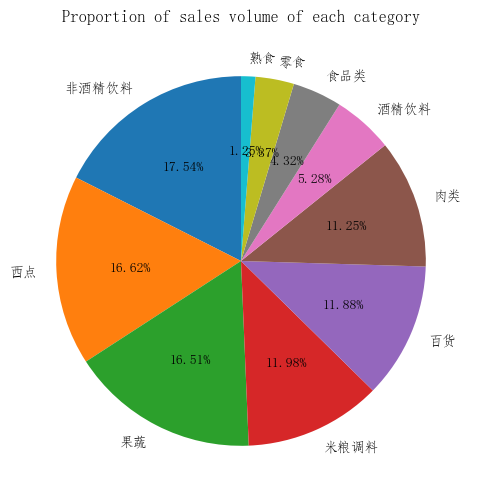

In [9]:
# 画饼图展示每类商品销量占比
import matplotlib.pyplot as plt

# 在下面补充代码：提取sort_link_group的'percent'列赋给data变量
data = sort_link_group['percent']
data_list=data.values.tolist() 
# 在下面补充代码：提取sort_link_group的'Types'列赋给labels变量
labels = sort_link_group['Types']
# 在下面补充代码：设置画布大小为8*6
fig = plt.figure(figsize = (8,6))
# 在下面补充代码：画饼图，数据为data，标签为labels，显示两位小数的百分比
plt.pie(data_list,labels=labels,autopct='%.2f%%',startangle=90)
# 在下面补充代码：设置饼图标题为'Proportion of sales volume of each category'
plt.title('Proportion of sales volume of each category')
# 在下面补充代码：将饼图保存为'persent.png'
plt.savefig('./persent.png')
# 显示饼图
plt.show()


进一步查看销量第一的非酒精饮料类商品的内部商品结构，并绘制饼图显示其销量占比情况，代码如下。

In [10]:
# 先筛选“非酒精饮料”类型的商品，然后求百分比，然后输出结果到文件。
# 挑选商品类别为“非酒精饮料”并排序
import warnings

# 先筛选“非酒精饮料”类型的商品，然后求百分比，然后输出结果到文件。
selected_goods = sort_links.loc[sort_links['Types'] == '非酒精饮料']
# 对所有的“非酒精饮料”求和
child_nums = selected_goods['count'].sum()
# 求百分比
selected_goods.loc[:,'child_percent'] = selected_goods.apply(lambda line: line['count']/child_nums,axis = 1)

print('非酒精饮料内部商品的销量及其占比:\n')
selected_goods
#outfile2 = './child_percent.csv'
#sort_link.to_csv(outfile2,index = False,header = True,encoding='gbk')  # 输出结果


非酒精饮料内部商品的销量及其占比:



C:\Users\fxq45\AppData\Local\Temp\ipykernel_10524\3174401498.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_goods.loc[:,'child_percent'] = selected_goods.apply(lambda line: line['count']/child_nums,axis = 1)


,Goods,count,Types,child_percent
0,全脂牛奶,2513,非酒精饮料,0.330919
3,苏打,1715,非酒精饮料,0.225836
5,瓶装水,1087,非酒精饮料,0.143139
16,水果/蔬菜汁,711,非酒精饮料,0.093627
22,咖啡,571,非酒精饮料,0.075191
38,超高温杀菌的牛奶,329,非酒精饮料,0.043324
45,其他饮料,279,非酒精饮料,0.036740
51,一般饮料,256,非酒精饮料,0.033711
101,速溶咖啡,73,非酒精饮料,0.009613
125,茶,38,非酒精饮料,0.005004


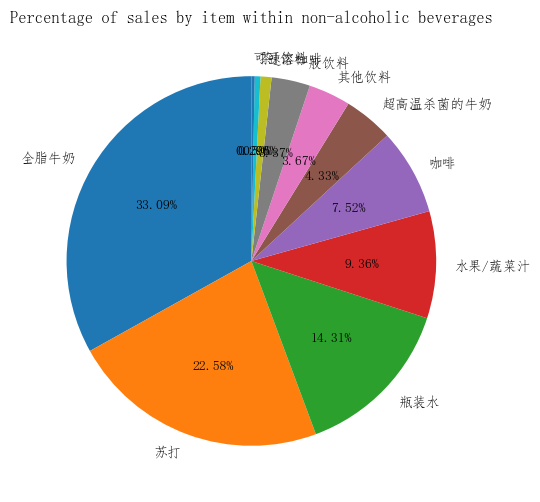

In [11]:
# 画饼图展示非酒精饮品内部各商品的销量占比
import matplotlib.pyplot as plt

# 在下面补充代码：选取selected_goods的'child_percent'赋给data
data = selected_goods['child_percent']
# 在下面补充代码：选取selected_goods的'Goods'赋给labels
labels = selected_goods['Goods']
# 在下面补充代码：设置画布大小为8*6 
fig = plt.figure(figsize = (8,6))
# 设置每一块分割出的间隙大小
explode = (0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.08,0.3,0.1,0.3)
# 在下面补充代码：画饼图，数据为data，标签为labels，显示两位数的百分比
plt.pie(data,labels=labels,autopct='%.2f%%',startangle=90)
# 在下面补充代码：设置饼图标题为'Percentage of sales by item within non-alcoholic beverages'
plt.title("Percentage of sales by item within non-alcoholic beverages")
# 在下面补充代码：保存图形到'child_persent.png'文件
plt.savefig('./child_persent.png')
# 展示图形
plt.show()

# 在课设报告中给出数据分析以及对商家的建议

### 数据预处理
通过对数据探索分析发现数据完整，并不存在缺失值。建模之前需要转变数据的格式，才能使用Apriori 函数进行关联分析。对数据进行转换，如代码如下。

In [18]:
import pandas as pd
inputfile='data2/GoodsOrder.csv'
# 在下面补充代码：读取inputfile文件的数据，赋给data变量
data = pd.read_csv(inputfile,encoding = 'gbk')
# 在下面补充代码：打印数据前5行
data.head()

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡


In [19]:
# 在下面补充代码：将data表中各'Goods'名前面加一个逗号
data['Goods'] = data['Goods'].apply(lambda x:','+x)
# 在下面补充代码：查看data的前5行数据
data.head()

,id,Goods
0,1,",柑橘类水果"
1,1,",人造黄油"
2,1,",即食汤"
3,1,",半成品面包"
4,2,",咖啡"


In [20]:
# 在下面补充代码：将data按'id'分组，求和，重置索引后重新赋给data
data = data.groupby('id').sum().reset_index()
# 在下面补充代码：查看data的前5行数据
data.head()

,id,Goods
0,1,",柑橘类水果,人造黄油,即食汤,半成品面包"
1,2,",咖啡,热带水果,酸奶"
2,3,",全脂牛奶"
3,4,",奶油乳酪,肉泥,仁果类水果,酸奶"
4,5,",炼乳,长面包,其他蔬菜,全脂牛奶"


In [21]:
# 将data的'Goods'数据的第一个逗号去掉后放回原处
data['Goods'] = data['Goods'].apply(lambda x :[x[1:]])
# 在下面补充代码：将data的'Goods'列转换为列表，赋给data_list变量
data_list = list(data['Goods'])
# 在下面补充代码：查看data_list的前5个元素
data_list[:5]

[['柑橘类水果,人造黄油,即食汤,半成品面包'],
 ['咖啡,热带水果,酸奶'],
 ['全脂牛奶'],
 ['奶油乳酪,肉泥,仁果类水果,酸奶'],
 ['炼乳,长面包,其他蔬菜,全脂牛奶']]

In [22]:
# 在下面补充代码：按逗号分割data_list的每个元素，赋给data_translation

data_translation = []
for i in data_list:
    p = i[0].split(',')
    data_translation.append(p)
print('数据转换结果的前5个元素：\n', )



# 在下面补充代码：查看data_translation的前5个元素
data_translation[0:5]

数据转换结果的前5个元素：



[['柑橘类水果', '人造黄油', '即食汤', '半成品面包'],
 ['咖啡', '热带水果', '酸奶'],
 ['全脂牛奶'],
 ['奶油乳酪', '肉泥', '仁果类水果', '酸奶'],
 ['炼乳', '长面包', '其他蔬菜', '全脂牛奶']]

### 模型构建

本案例的目标是探索商品之间的关联关系，因此采用关联规则算法，以挖掘它们之间的关联关系。关联规则算法主要用于寻找数据中项集之间的关联关系，它揭示了数据项间的未知关系。基于样本的统计规律，进行关联规则分析。根据所分析的关联关系，可通过一个属性的信息来推断另一个属性的信息。当置信度达到某一阈值时，就可以认为规则成立。
Apriori算法是常用的关联规则算法之一，也是最为经典的分析频繁项集的算法，它是第一次实现在大数据集上可行的关联规则提取的算法。除此之外，还有FP-Tree 算法，Eclat算法和灰色关联算法等。本案例主要使用Apriori算法进行分析。

#### 1. 商品购物篮关联规则模型构建

本次商品购物篮关联规则建模的流程如下图所示。
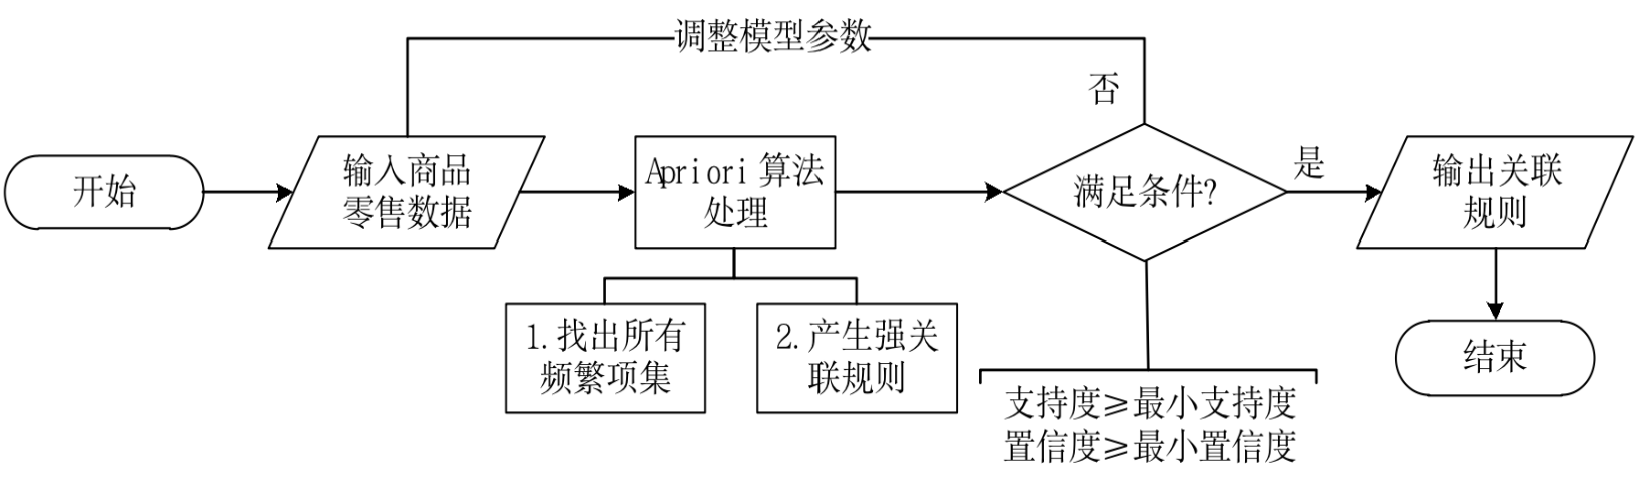
由上图可知，模型主要由输入、算法处理、输出3个部分组成。输入部分包括建模样本数据的输入和建模参数的输入。算法处理部分是采用 Apriori 关联规则算法进行处理。输出部分为采用 Apriori关联规则算法进行处理后的结果。
模型具体实现步骤∶首先设置建模参数最小支持度、最小置信度，输入建模样本数据;然后采用 Apriori 关联规则算法对建模的样本数据进行分析，以模型参数设置的最小支持度、最小置信度以及分析目标作为条件，如果所有的规则都不满足条件，则需要重新调整模型参数，否则输出关联规则结果。
目前，如何设置最小支持度与最小置信度并没有统一的标准。大部分都是根据业务经验设置初始值，然后经过多次调整，获取与业务相符的关联规则结果。本案例经过多次调整并结合实际业务分析，选取模型的输入参数为∶最小支持度0.02、最小置信度0.35。其关联规则代码如下。

In [23]:
# 构建关联规则模型
from numpy import *
 
def loadDataSet():
    return [['a', 'c', 'e'], ['b', 'd'], ['b', 'c'], ['a', 'b', 'c', 'd'], ['a', 'b'], ['b', 'c'], ['a', 'b'],
            ['a', 'b', 'c', 'e'], ['a', 'b', 'c'], ['a', 'c', 'e']]
 
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    # 映射为frozenset唯一性的，可使用其构造字典
    return list(map(frozenset, C1))     
    
# 从候选K项集到频繁K项集（支持度计算）
def scanD(D, Ck, minSupport):
    ssCnt = {}
    for tid in D:   # 遍历数据集
        for can in Ck:  # 遍历候选项
            if can.issubset(tid):  # 判断候选项中是否含数据集的各项
                if not can in ssCnt:
                    ssCnt[can] = 1  # 不含设为1
                else:
                    ssCnt[can] += 1  # 有则计数加1
    numItems = float(len(D))  # 数据集大小
    retList = []  # L1初始化
    supportData = {}  # 记录候选项中各个数据的支持度
    for key in ssCnt:
        support = ssCnt[key] / numItems  # 计算支持度
        if support >= minSupport:
            retList.insert(0, key)  # 满足条件加入L1中
            supportData[key] = support  
    return retList, supportData
 
def calSupport(D, Ck, min_support):
    dict_sup = {}
    for i in D:
        for j in Ck:
            if j.issubset(i):
                if not j in dict_sup:
                    dict_sup[j] = 1
                else:
                    dict_sup[j] += 1
    sumCount = float(len(D))
    supportData = {}
    relist = []
    for i in dict_sup:
        temp_sup = dict_sup[i] / sumCount
        if temp_sup >= min_support:
            relist.append(i)
# 此处可设置返回全部的支持度数据（或者频繁项集的支持度数据）
            supportData[i] = temp_sup
    return relist, supportData
 
# 改进剪枝算法
def aprioriGen(Lk, k):
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):  # 两两组合遍历
            L1 = list(Lk[i])[:k - 2]
            L2 = list(Lk[j])[:k - 2]
            L1.sort()
            L2.sort()
            if L1 == L2:  # 前k-1项相等，则可相乘，这样可防止重复项出现
                # 进行剪枝（a1为k项集中的一个元素，b为它的所有k-1项子集）
                a = Lk[i] | Lk[j]  # a为frozenset()集合
                a1 = list(a)
                b = []
                # 遍历取出每一个元素，转换为set，依次从a1中剔除该元素，并加入到b中
                for q in range(len(a1)):
                    t = [a1[q]]
                    tt = frozenset(set(a1) - set(t))
                    b.append(tt)
                t = 0
                for w in b:
                    # 当b（即所有k-1项子集）都是Lk（频繁的）的子集，则保留，否则删除。
                    if w in Lk:
                        t += 1
                if t == len(b):
                    retList.append(b[0] | b[1])
    return retList

def apriori(dataSet, minSupport=0.2):
# 前3条语句是对计算查找单个元素中的频繁项集
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))  # 使用list()转换为列表
    L1, supportData = calSupport(D, C1, minSupport)
    L = [L1]  # 加列表框，使得1项集为一个单独元素
    k = 2
    while (len(L[k - 2]) > 0):  # 是否还有候选集
        Ck = aprioriGen(L[k - 2], k)
        Lk, supK = scanD(D, Ck, minSupport)  # scan DB to get Lk
        supportData.update(supK)  # 把supk的键值对添加到supportData里
        L.append(Lk)  # L最后一个值为空集
        k += 1
    del L[-1]  # 删除最后一个空集
    return L, supportData  # L为频繁项集，为一个列表，1，2，3项集分别为一个元素

# 生成集合的所有子集
def getSubset(fromList, toList):
    for i in range(len(fromList)):
        t = [fromList[i]]
        tt = frozenset(set(fromList) - set(t))
        if not tt in toList:
            toList.append(tt)
            tt = list(tt)
            if len(tt) > 1:
                getSubset(tt, toList)

def calcConf(freqSet, H, supportData, ruleList, minConf=0.7):
    for conseq in H:  #遍历H中的所有项集并计算它们的可信度值
        conf = supportData[freqSet] / supportData[freqSet - conseq]  # 可信度计算，结合支持度数据
        # 提升度lift计算lift = p(a & b) / p(a)*p(b)
        lift = supportData[freqSet] / (supportData[conseq] * supportData[freqSet - conseq])
 
        if conf >= minConf and lift > 1:
            print(freqSet - conseq, '-->', conseq, '支持度', round(supportData[freqSet], 6), '置信度：', round(conf, 6),
                  'lift值为：', round(lift, 6))
            ruleList.append((freqSet - conseq, conseq, conf))

# 生成规则
def gen_rule(L, supportData, minConf = 0.7):
    bigRuleList = []
    for i in range(1, len(L)):  # 从二项集开始计算
        for freqSet in L[i]:  # freqSet为所有的k项集
            # 求该三项集的所有非空子集，1项集，2项集，直到k-1项集，用H1表示，为list类型,里面为frozenset类型，
            H1 = list(freqSet)
            all_subset = []
            getSubset(H1, all_subset)  # 生成所有的子集
            calcConf(freqSet, all_subset, supportData, bigRuleList, minConf)
    return bigRuleList
 
if __name__ == '__main__':
    dataSet = data_translation
    L, supportData = apriori(dataSet, minSupport = 0.02)
    rule = gen_rule(L, supportData, minConf = 0.35)

frozenset({'水果/蔬菜汁'}) --> frozenset({'全脂牛奶'}) 支持度 0.02664 置信度： 0.368495 lift值为： 1.44216
frozenset({'人造黄油'}) --> frozenset({'全脂牛奶'}) 支持度 0.024199 置信度： 0.413194 lift值为： 1.617098
frozenset({'仁果类水果'}) --> frozenset({'全脂牛奶'}) 支持度 0.030097 置信度： 0.397849 lift值为： 1.557043
frozenset({'牛肉'}) --> frozenset({'全脂牛奶'}) 支持度 0.021251 置信度： 0.405039 lift值为： 1.58518
frozenset({'冷冻蔬菜'}) --> frozenset({'全脂牛奶'}) 支持度 0.020437 置信度： 0.424947 lift值为： 1.663094
frozenset({'本地蛋类'}) --> frozenset({'其他蔬菜'}) 支持度 0.022267 置信度： 0.350962 lift值为： 1.813824
frozenset({'黄油'}) --> frozenset({'其他蔬菜'}) 支持度 0.020031 置信度： 0.361468 lift值为： 1.868122
frozenset({'本地蛋类'}) --> frozenset({'全脂牛奶'}) 支持度 0.029995 置信度： 0.472756 lift值为： 1.850203
frozenset({'黑面包'}) --> frozenset({'全脂牛奶'}) 支持度 0.025216 置信度： 0.388715 lift值为： 1.521293
frozenset({'糕点'}) --> frozenset({'全脂牛奶'}) 支持度 0.033249 置信度： 0.373714 lift值为： 1.462587
frozenset({'酸奶油'}) --> frozenset({'其他蔬菜'}) 支持度 0.028876 置信度： 0.402837 lift值为： 2.081924
frozenset({'猪肉'}) --> frozenset({'其他蔬菜'}

#### 2.模型分析

根据上述代码的运行结果，我们得出了26个关联规则。根据输出结果，对其中4条进行解释分析如下∶

1. `{其他蔬菜'，'酸奶"}=>{全脂牛奶'}`支持度约为2.23%，置信度约为51.29%。说明同时购买酸奶、其他蔬菜和全脂牛奶这3种商品的概率达51.29%，而这种情况发生的可能性约为2.23%。
2. `{其他蔬菜'}=>{全脂牛奶'}`支持度最大约为7.48%，置信度约为38.68%。说明同时购买其他蔬菜和全脂牛奶这两种商品的概率达 38.68%，而这种情况发生的可能性约为7.48%。
3. `{根茎类蔬菜'}=>{全脂牛奶'}`支持度约为4.89%，置信度约为44.87%。说明同时购买根茎类蔬菜和全脂牛奶这 3种商品的概率达44.87%，而这种情况发生的可能性约为4.89%。
4. `{根茎类蔬菜"}=>{'其他蔬菜'}`支持度约为4.74%，置信度约为43.47%。说明同时购买根茎类蔬菜和其他蔬菜这两种商品的概率达 43.47%，而这种情况发生的可能性约为4.74%。

分析发现，顾客购买酸奶和其他蔬菜的时候会同时购买全脂牛奶，其置信度最大达到51.29%。因此，顾客同时购买其他蔬菜、根茎类蔬菜和全脂牛奶的概率较高。对于模型结果，从购物者角度进行分析;现代生活中，大多数购物者为"家庭煮妇"，购头的商品大部分是食品。随着生活质量的提高和健康意设的的加其他蒸菜根芝类蔬菜和全脂牛奶均为现代家庭每日饮食的所需品。因此，其他蔬菜、根茎类蔬菜和全脂牛奶同时购买的概率较高，符合人们的现代生活健康意识。

#### 3.模型应用

以上的模型结果表明∶顾客购买其他商品的时候会同时购买全脂牛奶。因此，商场应该根据实际情况将全脂牛奶放在顾客购买商品的必经之路上，或是放在商场显眼的位置，以方便顾客拿取。顾客同时购买其他蔬菜、根茎类蔬菜、酸奶油、猪肉、黄油、本地蛋类和多种水果的概率较高，因此商场可以考虑捆绑销售，或者适当调整商场布置，将这些商品的距离尽量拉近，从而提升顾客的购物体验。